In [640]:
from files.utils.utility_functions import *
from files.classes.self_organizing_maps import *

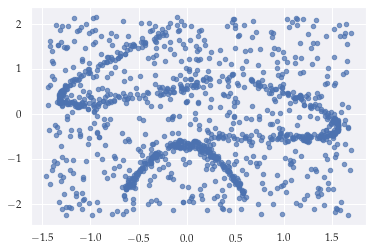

In [641]:
ds, gt = load_dataset_by_name("circles_parable3", with_outliers=True, base_path=joinpath("..", "..", ".."))

plot(ds)

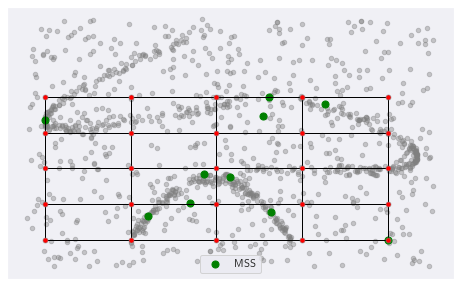

In [642]:
mss = ds[np.random.randint(0, len(ds), 10)]
som = SelfOrganizingMaps(5, 5, init_type=GRID, data=mss, sigma=2, lr=1)

# print(np.all(som.minisom.get_weights() == weights))
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.set_xticks([])
ax1.set_yticks([])
som.plot_weights_lattice(data=ds, ax=ax1, c="grey")
plt.scatter(mss[:,0], mss[:,1], color="green", s=50, label="MSS")
plt.legend()

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.07468487711407953


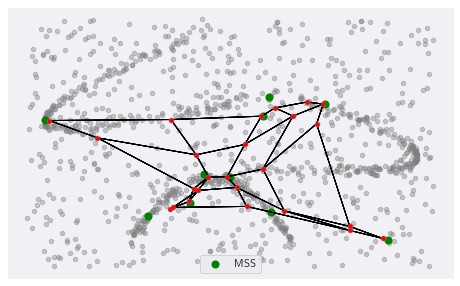

In [643]:
# for _ in range(10):
som.fit(data=mss, epochs=500, verbose=True)
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
ax2.set_xticks([])
ax2.set_yticks([])
som.plot_weights_lattice(ds, ax=ax2, c="gray")
plt.scatter(mss[:,0], mss[:,1], color="green", s=50, label="MSS")
plt.legend()

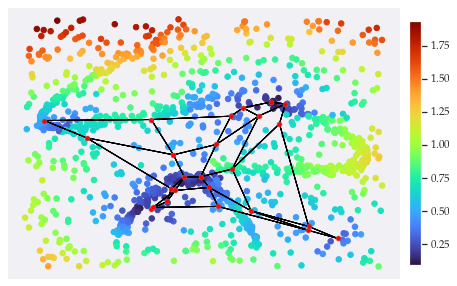

In [644]:
plt.rcParams.update(
    {"axes.facecolor": (0.91764706, 0.91764706, 0.94901961, 0.7)})

col = som.get_residuals(ds)
fig3, ax = plt.subplots(1, 1, figsize=(8, 5))
som.plot_weights_lattice(ax=ax)
im1 = ax.scatter(ds[:,0], ds[:,1], c=col, cmap="turbo", s=30)
ax.set_xticks([])
ax.set_yticks([])
fig3.colorbar(im1, ax=ax, shrink=0.9,
                                     fraction=0.1, pad=0.02)

In [646]:
fig1.savefig("MSS_som_square_before.pdf", bbox_inches="tight")
fig2.savefig("MSS_som_square_after.pdf", bbox_inches="tight")
fig3.savefig("MSS_som_square_residuals.pdf", bbox_inches="tight")